In [74]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
from chipcalibration import vna as vn
import qubic.job_manager as jm
import chipcalibration.config as cfg
from importlib import reload

In [75]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}


In [76]:
runner = rc.CircuitRunnerClient(ip='192.168.1.25', port=9096)

In [91]:
reload(vn)
vna = vn.Vna(0.02, np.linspace(6.54e9, 6.56e9, 100), 100)

In [92]:
jobman = jm.JobManager(fpga_config, channel_config, runner, qchip)

In [93]:
vna.run_and_report(jobman)

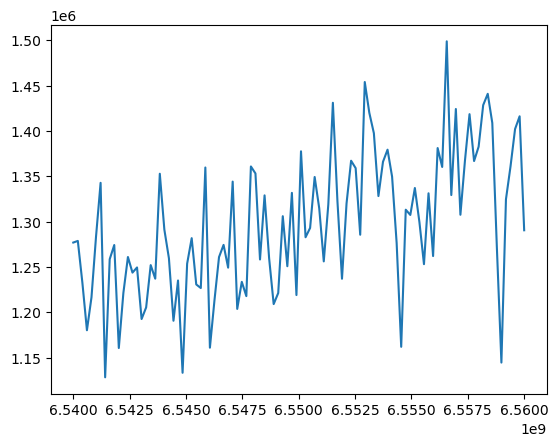

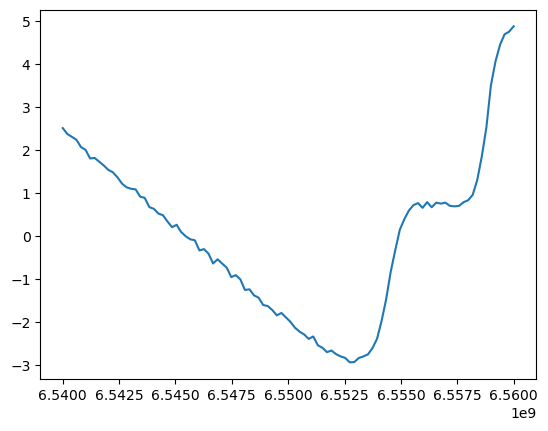

In [94]:
plt.plot(vna.freqs, vna.results['amp'])
plt.show()
plt.plot(vna.freqs, vna.results['phase'])
plt.show()